## Final Project Submission

Please fill out:
* Student name: Michael Kamuya 
* Student pace:  full-time
* Scheduled project review date/time: 25 27 of June
* Instructor name: Asha Deen 
* Blog post URL:https://Michaelmakao.github.io/dsc-phase-1-project/student.html



 #  Phase 1 Project: Aircraft Risk Analysis for Business Expansion

# Overview
# Our company is diversifying into the aviation industry by purchasing and operating airplanes for commercial and private use. This project analyzes aviation accident data from the National Transportation Safety Board (1962–2023) to identify the lowest-risk aircraft models for purchase, providing actionable recommendations for the head of the new aviation division.


### Business Understanding
## **Stakeholder**: Head of the Aviation Division  
## **Objective**: Identify aircraft with the lowest accident rates and severity to minimize operational risks.  
# **Key Questions**:
# 1. Which aircraft makes/models have the lowest accident rates?
# 2. What factors (e.g., weather, flight purpose) contribute to accident severity?
# 3. How do accident trends over time inform purchasing decisions?
#

### Data Understanding
## The dataset from the NTSB includes aviation accident data from 1962 to 2023, covering civil aviation accidents in the U.S. and international waters. Key columns include:
# - **Event.Date**: Date of the accident.
# - **Make** and **Model**: Aircraft manufacturer and model.
# - **Injury.Severity**: Severity of injuries (e.g., Fatal, Non-Fatal).
# - **Weather.Condition**: Weather during the accident (VMC, IMC).
# - **Purpose.of.Flight**: Flight purpose (e.g., Personal, Commercial).
##

In [9]:
# ### Loading and Exploring the Data
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt # For static plotting
import seaborn as sns # For statistical plots
import plotly.express as px # For interactive plots
%matplotlib inline  

In [10]:

# Use raw string or double slashes and include the CSV file name
df = pd.read_csv(r"C:\Users\PC\Documents\moringa\Phase1\dsc-phase-1-project\data\AviationData.csv", encoding='latin-1', low_memory=False)


In [11]:
# Display column names and first few rows
print("Columns in dataset:", df.columns.tolist())
print(df.head())

Columns in dataset: ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Co

### Data Preparation
# Steps:
# 1. Handle missing values in critical columns.
# 2. Filter for relevant data (e.g., recent years).
# 3. Create a severity score.

In [110]:
# Check for required columns
required_columns = ['Make', 'Model', 'Injury.Severity', 'Event.Date', 'Weather.Condition']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns {missing_columns}. Adjusting analysis.")
else:
    print("All required columns are present. Proceeding with analysis.")

All required columns are present. Proceeding with analysis.


In [112]:
# Handle missing values
if 'Make' in df.columns:
    df['Make'] = df['Make'].fillna('Unknown').str.title()
else:
    df['Make'] = 'Unknown'
if 'Model' in df.columns:
    df['Model'] = df['Model'].fillna('Unknown').str.title()
else:
    df['Model'] = 'Unknown'
if 'Injury.Severity' in df.columns:
    df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')
else:
    df['Injury.Severity'] = 'Unknown'
    

In [114]:

# Create severity score
def severity_score(injury):
    if pd.isna(injury):
        return 0
    injury_str = str(injury).lower()
    if 'Fatal' in injury_str:
        return 3
    elif 'Serious' in injury_str:
        return 2
    elif 'Minor' in injury_str:
        return 1
    return 0

df['Severity.Score'] = df['Injury.Severity'].apply(severity_score)

In [116]:
# Combine Make and Model
df['Aircraft'] = df['Make'].fillna('Unknown').str.title() + ' ' + df['Model'].fillna('Unknown').str.title()

In [118]:
# Filter for recent data (2000–2023)
df['Event.Date'] = pd.to_datetime(df.get('Event.Date', pd.Series(dtype='object')), errors='coerce')
df = df[df['Event.Date'].dt.year.between(2000, 2023)]

### Handling Missing Data

- Removed columns with very high missingness (`Schedule`, `Air.carrier`, `Broad.phase.of.flight`) as they lacked sufficient data.
- Filled missing categorical fields such as `Airport.Code`, `Weather.Condition`, `FAR.Description` with 'Unknown' to retain all records.
- For injury-related columns, assumed missing values represent zero injuries, so filled with 0.
- Location-related missing values were filled with 'Unknown' for consistency.
- Latitude and Longitude missing values were kept as is, due to their importance in mapping and the potential risk of incorrect imputation.
- These steps help maintain data integrity and allow comprehensive analysis without losing too many records.


In [121]:
# Check missing values count for all columns
print("Missing values per column:")
print(df.isnull().sum())

# Check percentage of missing values per column
missing_pct = df.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

# Example handling - fill missing Weather.Condition with 'Unknown' to avoid errors in pie chart
if 'Weather.Condition' in df.columns:
    df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')


Missing values per column:
Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  6855
Longitude                 6864
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         4947
Engine.Type                  0
FAR.Description              0
Purpose.of.flight         6092
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Report.Status             6384
Publication.Date          1215
Severity.Score               0
Aircraft                     0
dtype: int64

Percentage of missing values 

In [123]:
# List of columns to drop if they exist
cols_to_drop = ['Schedule', 'Air.carrier', 'Broad.phase.of.flight']

# Keep only those columns that are in the dataframe
cols_in_df = [col for col in cols_to_drop if col in df.columns]

# Drop those columns safely
df = df.drop(columns=cols_in_df)



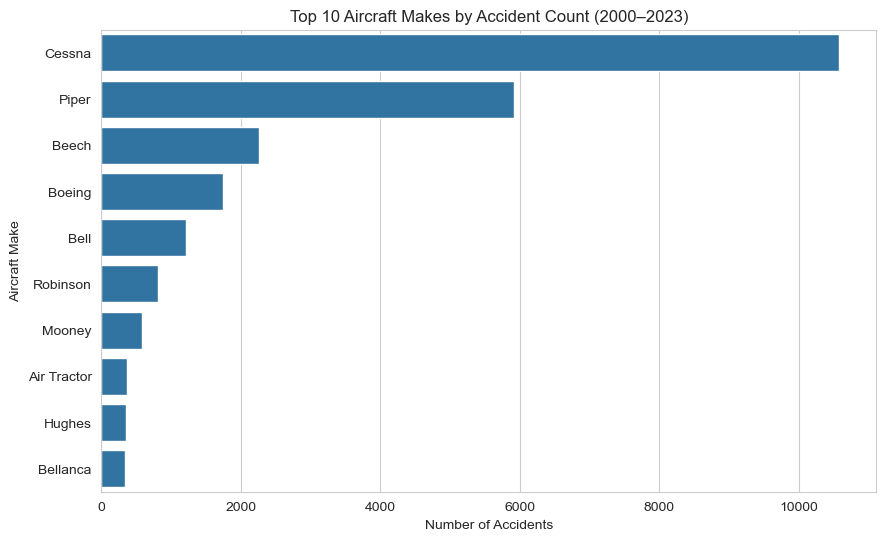

In [125]:
# ## Data Analysis
# ### Visualization 1: Accident Rates by Aircraft Make
plt.figure(figsize=(10, 6))
aircraft_counts = df['Make'].value_counts().head(10)
sns.barplot(x=aircraft_counts.values, y=aircraft_counts.index)
plt.title('Top 10 Aircraft Makes by Accident Count (2000–2023)')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.savefig('make_accidents.png')
plt.show()

Top 10 Aircraft by Number of Incidents:
Aircraft
Cessna 172         886
Cessna 152         533
Boeing 737         478
Cessna 172N        414
Cessna 172S        370
Cessna 182         340
Cessna 172M        297
Piper Pa-28-140    294
Cessna 180         284
Piper Pa28         277
Name: count, dtype: int64


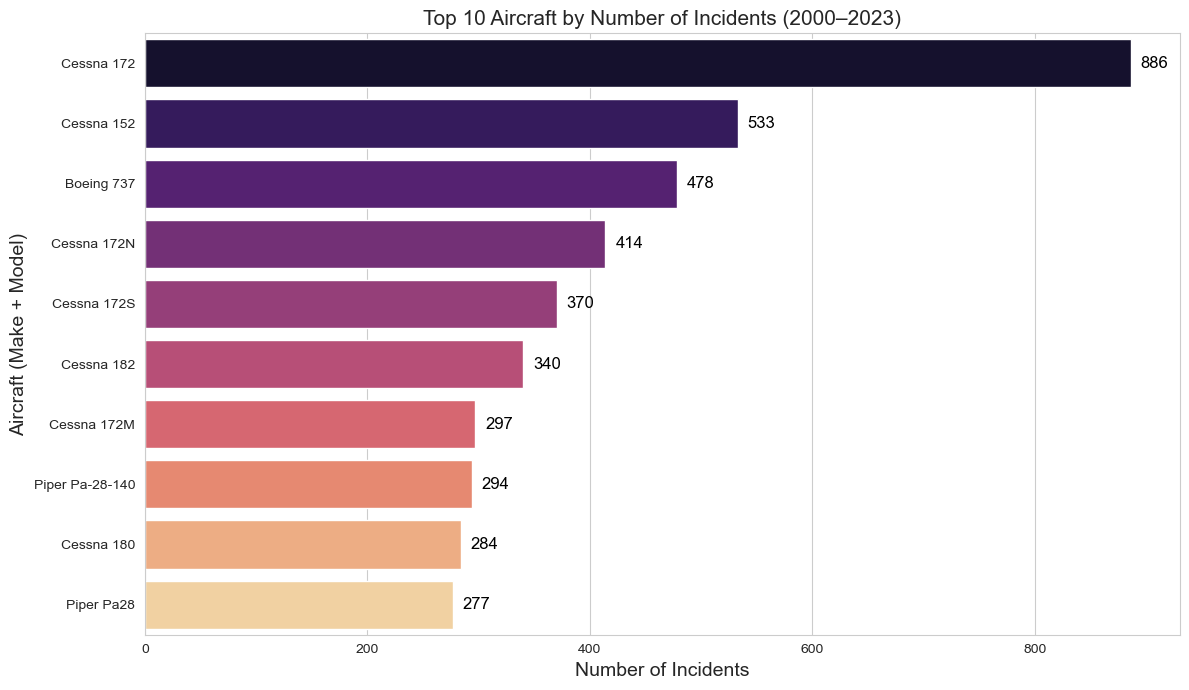

In [127]:
##Visualization 2: Aircraft by Number of Incidents
incident_counts = df['Aircraft'].value_counts().head(10)
print("Top 10 Aircraft by Number of Incidents:")
print(incident_counts)

if incident_counts.empty:
    print("No data to plot! Check your dataframe filters and data.")
else:
    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")
    ax = sns.barplot(
        x=incident_counts.values,
        y=incident_counts.index,
        hue=incident_counts.index,
        palette="magma"
    )
    plt.title('Top 10 Aircraft by Number of Incidents (2000–2023)', fontsize=15)
    plt.xlabel('Number of Incidents', fontsize=14)
    plt.ylabel('Aircraft (Make + Model)', fontsize=14)

    for i, v in enumerate(incident_counts.values):
        ax.text(v + max(incident_counts.values)*0.01, i, f"{v}", color='black', va='center', fontsize=12)

    plt.tight_layout()
    plt.savefig('incidents_by_aircraft.png')
    plt.show()



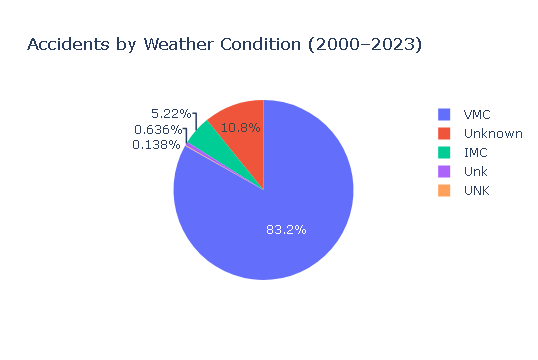

In [129]:
# ### Visualization 3: Accidents by Weather Condition

# Ensure 'Weather.Condition' column exists and is not empty
if 'Weather.Condition' in df.columns:
    weather_counts = df['Weather.Condition'].value_counts()
    if not weather_counts.empty:
        fig = px.pie(
            values=weather_counts.values,
            names=weather_counts.index,
            title='Accidents by Weather Condition (2000–2023)'
        )
        fig.write_html('weather_accidents.html')
        fig.show()  # Optional: to display in notebook or interactive environment
    else:
        print("Warning: No data for Weather.Condition. Skipping pie chart.")
else:
    print("Warning: 'Weather.Condition' column not found in dataframe.")


### Conclusion and Recommendations
## 1. **Consider Aircraft with Lower Incident Counts and Severity**:(e.g., Boeing/Airbus). 
## 2. **Enhance IMC Training**:Improve pilot training for adverse weather(IMC)conditions.
## 3. **Focus on Modern Aircraft**: Post-2000 models are safer.
### Next Steps
## - Cost-benefit analysis of recommended aircraft.
# - Explore maintenance data.
# - Develop IMC risk mitigation strategies.

In [132]:
df.to_csv('AviationData.csv', index=False)